Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [11]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [13]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 40

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

display(lbl_train)

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

0 in 0
1 in 0
2 in 0
0 in 1
1 in 1
2 in 1
0 in 2
1 in 2
2 in 2
0 in 3
1 in 3
2 in 3
0 in 4
1 in 4
2 in 4
[[0.9811000227928162, 0.9814000129699707, 0.9828000068664551], [0.9815999865531921, 0.9824000000953674, 0.9824000000953674], [0.9810000061988831, 0.9811999797821045, 0.9825000166893005], [0.9829000234603882, 0.9825000166893005, 0.9818999767303467], [0.979200005531311, 0.9797000288963318, 0.9819999933242798]]


ValueError: x and y must be the same size

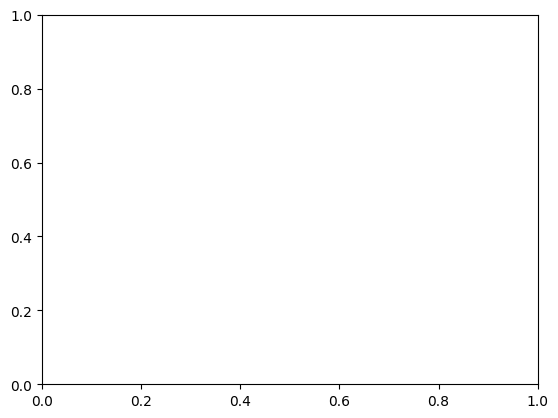

In [35]:
import numpy as np

regfactors: list[float] = [0.000001, 0.000123,  0.00001, 0.0001,  0.001]

def trainwithfactor(regvalue: float) -> float:
        ## Define model ##
        model = Sequential()
        
        model.add(Flatten())
        model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(regvalue)))
        model.add(Dense(num_classes, activation='softmax'))

        model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=0,
                validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        return score[1]

results = []

for factor in regfactors:
        res: list[float] = []
        for i in range(3):
                print(i, "in", regfactors.index(factor))
                res.append(trainwithfactor(factor))
        results.append(res)

print(results)

plt.scatter([np.std(tup) for tup in results], [1,2,3])
plt.show()

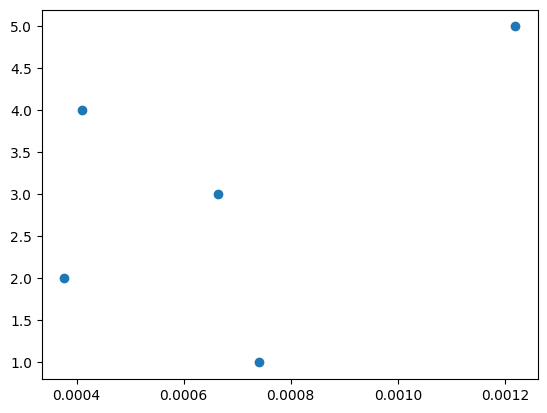

In [36]:
res = [[0.9811000227928162, 0.9814000129699707, 0.9828000068664551], [0.9815999865531921, 0.9824000000953674, 0.9824000000953674], [0.9810000061988831, 0.9811999797821045, 0.9825000166893005], [0.9829000234603882, 0.9825000166893005, 0.9818999767303467], [0.979200005531311, 0.9797000288963318, 0.9819999933242798]]
resstds = [np.std(tup) for tup in res]
plt.scatter(resstds, [1,2,3,4,5])
plt.show()

In [33]:
model = Sequential()
model.add(Conv2D(filters=2, kernel_size=(3,3), input_shape=(28,28,1)))   
model.add(Flatten())
model.add(Dense(500, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(300, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.0001)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

model.fit(x_train, y_train,
        batch_size=batch_size,
        epochs=40,
        verbose=1,
        validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
model.summary()
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 5s 9ms/step - loss: 0.3851 - accuracy: 0.9168 - val_loss: 0.2267 - val_accuracy: 0.9620
Epoch 2/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2059 - accuracy: 0.9706 - val_loss: 0.2059 - val_accuracy: 0.9681
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1733 - accuracy: 0.9790 - val_loss: 0.2354 - val_accuracy: 0.9596
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1559 - accuracy: 0.9850 - val_loss: 0.1790 - val_accuracy: 0.9774
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1437 - accuracy: 0.9876 - val_loss: 0.1659 - val_accuracy: 0.9809
Epoch 6/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1337 - accuracy: 0.9908 - val_loss: 0.1687 - val_accuracy: 0.9796
Epoch 7/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1251 - accuracy: 0.9934 - val_loss: 0.1710 - val_accuracy: 0.9788
Epoch 

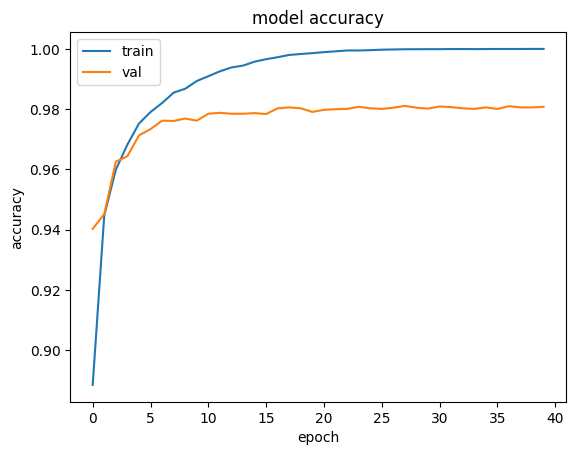

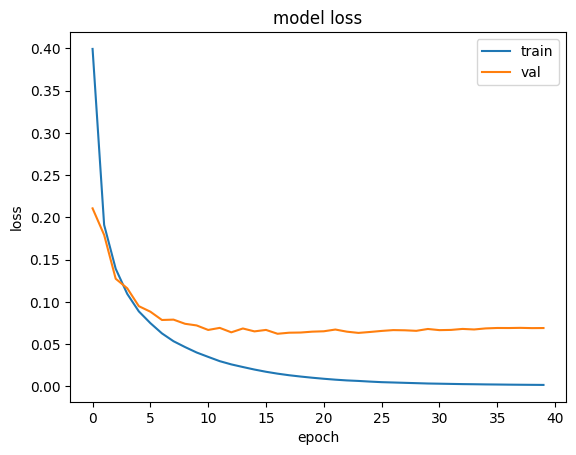

In [16]:
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

plt.plot(fit_info.history['loss'])
plt.plot(fit_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

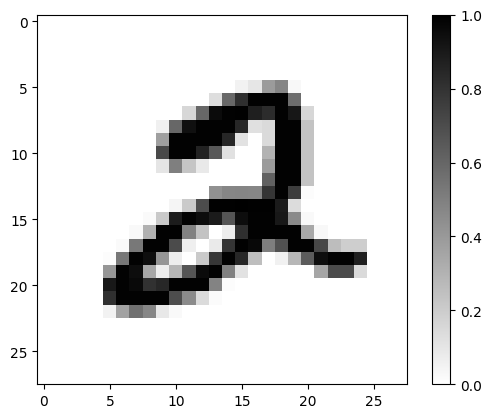

In [17]:
plt.figure()
plt.imshow(x_train[5], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

### Question 4) Auto-Encoder for denoising


In [18]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [19]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1907 - val_loss: 0.1533
Epoch 2/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1461 - val_loss: 0.1392
Epoch 3/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1369 - val_loss: 0.1336
Epoch 4/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1319 - val_loss: 0.1298
Epoch 5/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1286 - val_loss: 0.1279
Epoch 6/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1264 - val_loss: 0.1273
Epoch 7/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1247 - val_loss: 0.1247
Epoch 8/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1234 - val_loss: 0.1242
Epoch 9/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1225 - val_loss: 0.1231
Epoch 10/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1216 - val_loss: 0.1230